In [105]:
import code_1 as data_processing
import code_2 as model_training

In [106]:
data = data_processing.data_pipeline()

===== Feature Scailing Result =====

   x1_kernel_area  x2_kernel_length wheat_varieties
0        0.141759         -2.742037            Kama
1        0.011161          0.080887            Kama
2       -0.191609          0.006191            Kama
3       -0.346264         -0.005213            Kama
4        0.444196          0.205760            Kama 

       x1_kernel_area  x2_kernel_length
count    2.100000e+02      2.100000e+02
mean    -3.214360e-16     -6.767074e-17
std      1.000000e+00      1.000000e+00
min     -1.463218e+00     -2.742259e+00
25%     -8.858385e-01      8.373802e-02
50%     -1.692697e-01      2.060454e-01
75%      8.445808e-01      5.772442e-01
max      2.176333e+00      9.601320e-01



In [107]:
model = model_training.model_training_pipeline(data)

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
x, _ = model_training.get_xy(data, ['x1_kernel_area', 'x2_kernel_length'], 'wheat_varieties')
predict = model.predict(x)

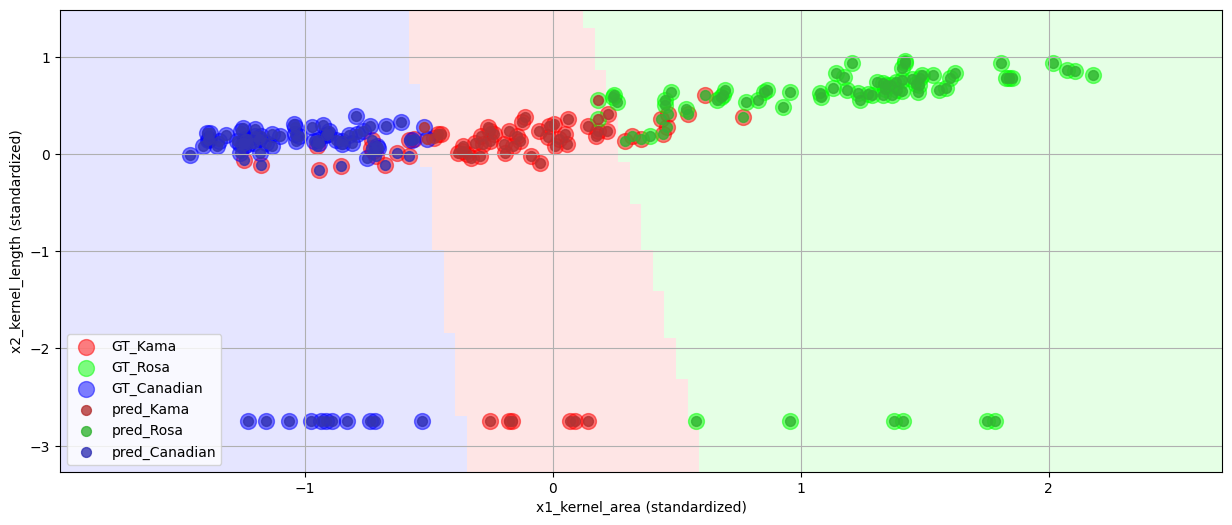

In [118]:
df_cls_pred_kama = data[predict == 'Kama']
df_cls_pred_rosa = data[predict == 'Rosa']
df_cls_pred_canadian = data[predict == 'Canadian']

df_cls_kama = data[data['wheat_varieties'] == 'Kama']
df_cls_rosa = data[data['wheat_varieties'] == 'Rosa']
df_cls_canadian = data[data['wheat_varieties'] == 'Canadian']

x_coord = 'x1_kernel_area'
y_coord = 'x2_kernel_length'

plt.figure(figsize=(15, 6))
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    model,
    x,
    ax=plt.gca(),
    alpha=0.1,
    cmap=plt.cm.brg,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="x1_kernel_area (standardized)",
    ylabel="x2_kernel_length (standardized)",
    eps=0.5,
)
# visualize gts
gt_marker_size = 130
plt.scatter(df_cls_kama[x_coord], df_cls_kama[y_coord], label='GT_Kama', color=(1,0,0,0.5), s=gt_marker_size)
plt.scatter(df_cls_rosa[x_coord], df_cls_rosa[y_coord], label='GT_Rosa', color=(0,1,0,0.5), s=gt_marker_size)
plt.scatter(df_cls_canadian[x_coord], df_cls_canadian[y_coord], label='GT_Canadian', color=(0,0,1,0.5), s=gt_marker_size)
# visualize predictions
pred_marker_size = 50
plt.scatter(df_cls_pred_kama[x_coord], df_cls_pred_kama[y_coord], label='pred_Kama', color=(0.7,0.2,0.2,0.8), s=pred_marker_size)
plt.scatter(df_cls_pred_rosa[x_coord], df_cls_pred_rosa[y_coord], label='pred_Rosa', color=(0.2,0.7,0.2,0.8), s=pred_marker_size)
plt.scatter(df_cls_pred_canadian[x_coord], df_cls_pred_canadian[y_coord], label='pred_Canadian', color=(0.2,0.2,0.7,0.8), s=pred_marker_size)
plt.grid()
plt.legend()